In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
%matplotlib inline

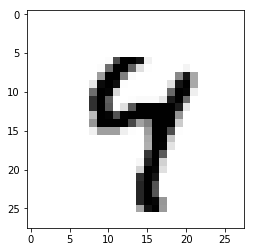

In [12]:
# visualize what the data looks like
sample = mnist.train.images[2].reshape(28,28)
plt.imshow(sample, cmap='Greys')

In [13]:
# Define parameters for training
# learning rate (how quickly the cost function is adjusted)
learning_rate = 0.001
# training epochs (how many training cycle to go through)
training_epochs = 15
# size of the batches of training data
batch_size = 100

In [14]:
# 10 possible outputs from 0 - 9
n_classes = 10
# Num of samples in data
n_samples = mnist.train.num_examples

In [15]:
# what we expect the input to look like
n_input = 784

In [16]:
# number of neurons in first hidden layer
n_hidden_1 = 256
# number of neurons in second hidden layer
n_hidden_2 = 256

In [17]:
def multilayer_perceptron(x,weights,biases):
    '''
    x: Placeholder for Data Input
    weights: Dict of weights
    biases: dict of bias values
    '''
    
    # First Hidden Layer with RELU Activation
    # X * W + B
    layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
    # RELU(X * W + B) = RELU ->  f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    #Second Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    #Last Output Layer
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    
    return out_layer 
    

In [18]:
# make weight dictionary

weights = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}


In [19]:
# make biases dictionary
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [20]:
x = tf.placeholder('float',[None,n_input])

In [21]:
y = tf.placeholder('float',[None,n_classes])

In [22]:
# Construct model
pred = multilayer_perceptron(x, weights, biases)

In [25]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)




In [26]:
# Run session

sess = tf.InteractiveSession()

In [28]:
# Initializing the variables
init = tf.global_variables_initializer()

In [31]:
# 15 loops
# training_epochs = 15

sess.run(init)

for epoch in range(training_epochs):
    
    # Cost
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        
        _,c = sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        
        # Average Loss 
        avg_cost += c/total_batch
        
    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))
    
print("Model has completed {} Epochs of training".format(training_epochs))


    


Epoch: 1 cost=156.2893
Epoch: 2 cost=38.3124
Epoch: 3 cost=24.2077
Epoch: 4 cost=16.6557
Epoch: 5 cost=12.2072
Epoch: 6 cost=9.0535
Epoch: 7 cost=6.7135
Epoch: 8 cost=5.0896
Epoch: 9 cost=3.7315
Epoch: 10 cost=2.8349
Epoch: 11 cost=2.2116
Epoch: 12 cost=1.6116
Epoch: 13 cost=1.1371
Epoch: 14 cost=0.9615
Epoch: 15 cost=0.8236
Model has completed 15 Epochs of training


In [32]:
# Evaluating the model

correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [38]:
# change from bool to float 
correct_predictions = tf.cast(correct_predictions,'float')

In [39]:
print(correct_predictions[1])

Tensor("strided_slice_3:0", shape=(), dtype=float32)


In [40]:
accuracy = tf.reduce_mean(correct_predictions)

In [44]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.94919997